In [1]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from IPython.display import Markdown as md
np.random.seed(42)

In [2]:
var1 = np.random.normal(size=[1000, 1])
var2 = np.random.normal(size=[1000])

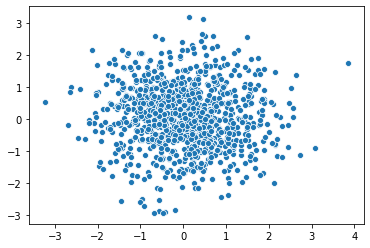

In [3]:
sns.scatterplot(x=var1[:, 0], y=var2)

In [4]:
mdl = sm.OLS(var2, var1, hasconst=False)
fit_result = mdl.fit()

In [5]:
fit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.513
Date:                Tue, 03 Mar 2020   Prob (F-statistic):                       0.219
Time:                        22:25:18   Log-Likelihood:                         -1417.7
No. Observations:                1000   AIC:                                      2837.
Df Residuals:                     999   BIC:                                      2842.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0397      0.032     -1.230      0.219      -0.103       0.024
==============================================================================
Omnibus:                        0.830   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.708
Skew:                          -0.049   Prob(JB):                        0.702
Kurtosis:                       3.085   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
fit_result.pvalues[0]

0.21893062260853124

The p-value of the coefficient is above 0.05, thus no statistical significance is present.

In [7]:
step = 0.1
varx = np.arange(np.round(var1.min()), np.round(var1.max()) + step, step)
vary = fit_result.predict(exog = np.reshape(varx, [-1, 1]))

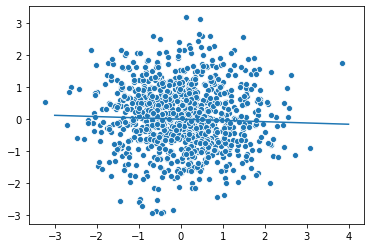

In [8]:
ax = sns.scatterplot(x=var1[:, 0], y=var2)
sns.lineplot(varx, vary, ax=ax);

In [9]:
sims = 1000
zscores = []
for _ in range(sims):
    var1 = np.random.normal(size=[1000,])
    var2 = np.random.normal(size=[1000,])
    model_fit = sm.OLS(var1, var2).fit()
    zscore = model_fit.params[0] / model_fit.pvalues[0]
    zscores.append(zscore)

In [10]:
significant_sims = len(list(filter(lambda x: x>2, zscores)))
md(f"{significant_sims} ({significant_sims*100/sims}%) simulations provided z-score above 2")

23 (2.3%) simulations provided z-score above 2